In [6]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.image as img

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

im=img.imread(r'/Users/shivyucel/Documents/projects/DPhil/Code_Data/misc/north_arrow.jpeg')
#worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
#worldmap.to_crs(epsg=3857, inplace=True)


In [7]:
us = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/united_states/THI_mobility_heat_w_vars_90_4SD_precip_Global2.csv')
us['adm0'] = 'United States'
us.rename(columns={'popdens_de': 'popden_dec'}, inplace=True)
us.rename(columns={'Heat Wave Duration_y': 'Heat Wave Duration'}, inplace=True)
us_plot = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/united_states/clean_shp.shp')
us_plot = us_plot[us_plot['adm1'] != 'Alaska']
us_plot['adm0'] = 'United States'


br = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/brazil/THI_mobility_heat_w_vars_90_4SD_precip_Global2.csv')
br['adm0'] = 'Brazil'
br.rename(columns={'temp_diff': 'thi_diff'}, inplace=True)
br.rename(columns={'popdens_de': 'popden_dec'}, inplace=True)
br_plot = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/brazil/clean_shp.shp')
br_plot['adm0'] = 'Brazil'

ind = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/india/THI_mobility_heat_w_vars_90_4SD_precip.csv')
ind['adm0'] = 'India'
ind.rename(columns={'temp_diff': 'thi_diff'}, inplace=True)
ind.rename(columns={'popdens_de': 'popden_dec'}, inplace=True)
ind_plot = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/india/clean_shp.shp')
ind_plot['adm0'] = 'India'


ng = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/nigeria/THI_mobility_heat_w_vars_90_4SD_precip_Global2.csv')
ng['adm0'] = 'Nigeria'
ng.rename(columns={'temp_diff': 'thi_diff'}, inplace=True)
ng.rename(columns={'popdens_de': 'popden_dec'}, inplace=True)
ng_plot = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/nigeria/clean_shp.shp')
ng_plot['adm0'] = 'Nigeria'

fr = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/france/THI_mobility_heat_w_vars_90_4SD_precip_Global2.csv')
fr['adm0'] = 'France'
fr.rename(columns={'temp_diff': 'thi_diff'}, inplace=True)
fr.rename(columns={'popdens_de': 'popden_dec'}, inplace=True)
#france-specific change
fr_plot = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/france/clean_shp.shp')
fr_plot.rename(columns={'name_1': 'adm1'}, inplace=True)
fr_plot['location'] = fr_plot['adm2'] + ', ' + fr_plot['adm1']
fr_plot['adm0'] = 'France'

tr = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/turkey/THI_mobility_heat_w_vars_90_4SD_precip_Global2.csv')
tr['adm0'] = 'Turkey'
tr.rename(columns={'temp_diff': 'thi_diff'}, inplace=True)
tr.rename(columns={'popdens_de': 'popden_dec'}, inplace=True)
tr.rename(columns={'Heat Wave Duration_y': 'Heat Wave Duration'}, inplace=True)
tr_plot = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/turkey/clean_shp.shp')
tr_plot['adm0'] = 'Turkey'


ch = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/paper2_repo/__clean/data/revisions/china_G2.csv')
ch.rename(columns={'popdens_dec': 'popden_dec'}, inplace=True)
ch['adm0'] = 'China'
concat = pd.concat([fr, br, us, tr, ind, ng, ch])

In [10]:
len(ng['location'].unique())

158

In [11]:
concat_shp = gpd.GeoDataFrame(pd.concat([fr_plot, br_plot, us_plot, tr_plot, ng_plot, ind_plot])).set_crs(epsg='4326', allow_override=True)
concat_shp.to_crs(epsg=3857, inplace=True)

/Users/shivyucel/opt/anaconda3/envs/geo2/lib/python3.11/site-packages/geopandas/array.py:1755: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


In [12]:
mean_thi = concat.groupby('location')['thi_heat'].mean().reset_index()

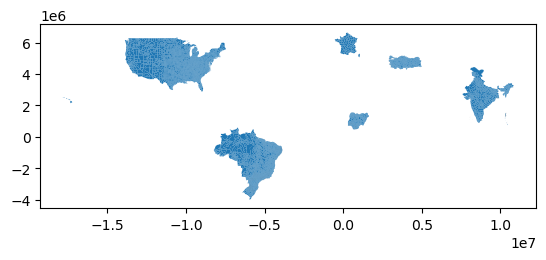

In [13]:
concat_shp.plot()
concat_plot_data = gpd.GeoDataFrame(mean_thi.merge(concat_shp, on='location')).set_crs(epsg='3857', allow_override=True)

In [14]:
ng

,Unnamed: 0,index,country_region_code,country_region,adm1,adm2,metro_area,iso_3166_2_code,census_fips_code,place_id,...,coast,HDI_dec,popden_dec,over60_dec,elev_1500m,time_x,rain_standard_control,time_y,rain_standard_heat,adm0
0,0,0,NG,Nigeria,Abia,Aba North,NaN,NaN,NaN,ChIJJ9SHpK2eQhARZRwKEePBcuk,...,0,8,10,7,0,2022-02-28,41.208791,2022-03-07,70.329670,Nigeria
1,1,1,NG,Nigeria,Abia,Aba North,NaN,NaN,NaN,ChIJJ9SHpK2eQhARZRwKEePBcuk,...,0,8,10,7,0,2022-02-22,10.439560,2022-03-08,72.527473,Nigeria
2,4,4,NG,Nigeria,Abia,Aba South,NaN,NaN,NaN,ChIJcXDuChycQhARUr8yL5GPm98,...,0,8,10,7,0,2022-03-15,70.879121,2022-03-29,54.395604,Nigeria
3,5,5,NG,Nigeria,Abia,Aba South,NaN,NaN,NaN,ChIJcXDuChycQhARUr8yL5GPm98,...,0,8,10,7,0,2022-03-23,73.076923,2022-03-30,68.681319,Nigeria
4,6,6,NG,Nigeria,Abia,Aba South,NaN,NaN,NaN,ChIJcXDuChycQhARUr8yL5GPm98,...,0,8,10,7,0,2022-03-24,90.659341,2022-03-31,58.791209,Nigeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,624,629,NG,Nigeria,Kaduna,Zaria,NaN,NaN,NaN,ChIJ_7yiNKScshERoSJKBIGnTmY,...,0,4,9,2,0,2022-03-30,7.967033,2022-04-06,61.813187,Nigeria
1440,625,630,NG,Nigeria,Kaduna,Zaria,NaN,NaN,NaN,ChIJ_7yiNKScshERoSJKBIGnTmY,...,0,4,9,2,0,2022-03-31,7.967033,2022-04-07,82.417582,Nigeria
1441,627,632,NG,Nigeria,Kaduna,Zaria,NaN,NaN,NaN,ChIJ_7yiNKScshERoSJKBIGnTmY,...,0,4,9,2,0,2022-03-25,84.615385,2022-04-08,87.362637,Nigeria
1442,628,633,NG,Nigeria,Kaduna,Zaria,NaN,NaN,NaN,ChIJ_7yiNKScshERoSJKBIGnTmY,...,0,4,9,2,0,2022-03-26,17.032967,2022-04-09,7.967033,Nigeria


In [14]:
ng['thi_heat'].mean()

np.float64(38.65446839347315)

In [7]:
dissolved = concat_shp.dissolve(by='adm0')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.27, 0.021999999999999992, 'N')

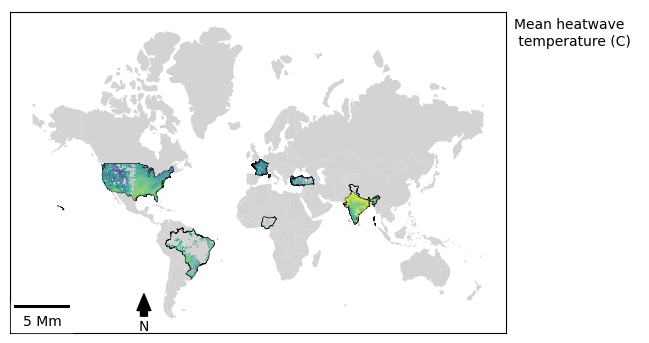

In [8]:
fig, ax = plt.subplots()
worldmap.plot(color="lightgrey", ax=ax)
dissolved.plot(edgecolor='black', facecolor='none', ax=ax, linewidth=0.5)
concat_plot_data.plot(ax=ax, column='thi_heat')
ax.add_artist(ScaleBar(1, location='lower left')  )

ax.set_yticks([])
ax.set_xticks([])
ax.legend(loc=(1, .83),
          fontsize=15,
          frameon=False,
          title="Mean heatwave \n temperature (C)")

x, y, arrow_length = 0.27, 0.122, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=10),
            ha='center', va='center', fontsize=10,
            xycoords=ax.transAxes)




In [33]:
concat.groupby('adm0').apply(lambda x: len(x['location'].unique()))

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_91902/1791241375.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  concat.groupby('adm0').apply(lambda x: len(x['location'].unique()))


adm0
Brazil           1484
China             339
France             91
India             602
Nigeria           158
Turkey            484
United States    1593
dtype: int64

In [34]:
concat.groupby('adm0').apply(lambda x: len(x['location'].unique()))

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_91902/1791241375.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  concat.groupby('adm0').apply(lambda x: len(x['location'].unique()))


adm0
Brazil           1484
China             339
France             91
India             602
Nigeria           158
Turkey            484
United States    1593
dtype: int64

In [17]:
concat.drop_duplicates('heat_ID').groupby('adm0').count()

,Unnamed: 0,index,adm1,adm2,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,...,makeup_day_heat,t2m_heat,mob_index_control,holiday_control,makeup_day_control,mobility_difference,t2m_control,popdens_dec,baseline_mobility,mobility_diff_pct
adm0,,,,,,,,,,,,,,,,,,,,,
Brazil,3682,3682,3682,3682,3682,3682,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
China,1436,1436,1436,1436,0,0,0,0,0,0,...,1436,1436,1436,1436,1436,1436,1436,1436,1436,1436
France,483,483,483,483,483,483,483,483,0,483,...,0,0,0,0,0,0,0,0,0,0
India,1574,1574,1574,1574,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nigeria,459,459,459,459,459,459,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Turkey,1645,1645,1645,1645,1645,1645,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
United States,11807,11807,11807,11807,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
concat_clean = concat[['adm0', 'adm1', 'adm2', 'location', 'Heat Wave Duration', 'rain_standard_heat', 'rain_standard_control', 'heatwave_dur', 'diff', 'thi_heat', 'thi_diff', 'heat_ID', 'stage_frac', 'weekend', 'popden_dec', 'over60_dec', 'HDI_dec', 'coast', 'mean_elev', 'elev_1500m', 'residential_difference', 'workplaces_difference', 'transit_difference', 'grocery_pharm_difference', 'retail_rec_difference', 'parks_difference']]

In [16]:
concat_clean.to_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/THI_concat_mobility_heat_w_vars_90_4SD_precip_g2.csv")

In [ ]:
concat = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/THI_concat_mobility_heat_w_vars_90_4SD_precip_g2.csv')

In [51]:
concat.drop_duplicates('heat_ID', inplace=True)

In [53]:
concat.groupby('adm0').apply(lambda x: len(x['heat_ID'].unique()) / len(x['location'].unique()))

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_91902/2906931760.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  concat.groupby('adm0').apply(lambda x: len(x['heat_ID'].unique()) / len(x['location'].unique()))


adm0
Brazil           2.423963
China            4.235988
France           5.307692
India            2.584565
Nigeria          2.905063
Turkey           3.357143
United States    4.336026
dtype: float64

In [49]:
concat.groupby('adm0')['thi_heat'].describe()

,count,mean,std,min,25%,50%,75%,max
adm0,,,,,,,,
Brazil,11402.0,35.651855,2.712837,26.965857,34.014086,35.775080,37.398110,43.212328
China,4558.0,36.507790,5.554747,21.674315,31.774508,36.933214,41.276301,51.377591
France,1794.0,30.812769,2.909940,22.077067,28.990039,30.607297,32.852230,40.381575
India,5741.0,41.012001,4.948661,19.090580,39.511865,42.294743,44.276597,49.439260
Nigeria,1444.0,38.654468,1.601258,30.836104,37.887588,38.905233,39.715405,42.386288
Turkey,6217.0,31.712465,3.368139,21.178218,29.497363,31.104454,33.725993,42.415860
United States,33879.0,36.688226,3.688439,22.352820,34.350948,37.603125,39.481195,44.702426


In [17]:
concat.groupby('adm0').apply(lambda x: len(x['adm2'].unique()))

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_91902/4025040275.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  concat.groupby('adm0').apply(lambda x: len(x['adm2'].unique()))


adm0
Brazil           1484
China             339
France             91
India             603
Nigeria           158
Turkey            485
United States    1602
dtype: int64

In [19]:
concat.drop_duplicates('heat_ID', inplace=True)

In [20]:
concat.groupby('adm0')['heat_ID'].count()

adm0
Brazil            3682
China             1436
France             483
India             1574
Nigeria            459
Turkey            1645
United States    11807
Name: heat_ID, dtype: int64

Text(0.5, 1.0, 'Distribution of heatwave day intensities')

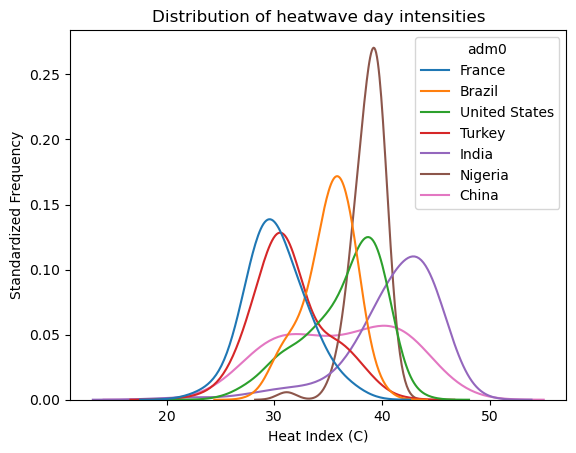

In [11]:
fig, ax = plt.subplots()
sns.kdeplot(data=concat_clean, ax=ax, x='thi_heat', c='blue', hue='adm0', common_norm=False, bw_adjust=2)
plt.xlabel("Heat Index (C)")
plt.ylabel("Standardized Frequency")
plt.title("Distribution of heatwave day intensities")